In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad_t(x):
    return np.array([[1,-x]],dtype='float')

def grad_b(x):
    return np.array([[0]])

In [3]:
def grad_log_normal(x,mu=0, sigma=1):
    return -(x-mu)/sigma**2

In [4]:
def m(x):
    return np.sqrt(1/(1+x**2))

In [14]:
x = np.linspace(-10,10,100000)

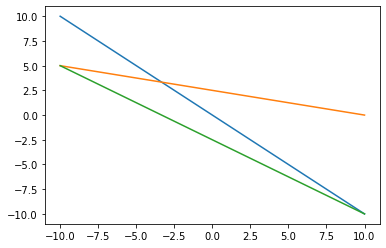

In [15]:
plt.plot(x,grad_log_normal(x))
plt.plot(x,grad_log_normal(x,mu=10, sigma=2))
plt.plot(x,grad_log_normal(x)-grad_log_normal(x,mu=10, sigma=2))

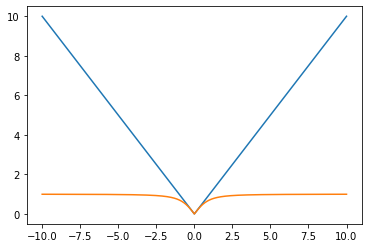

In [16]:
plt.plot(x,np.linalg.norm((grad_log_normal(x)).reshape(1,100000), axis=0))
plt.plot(x,np.linalg.norm(((grad_log_normal(x))*m(x)).reshape(1,100000),axis=0))

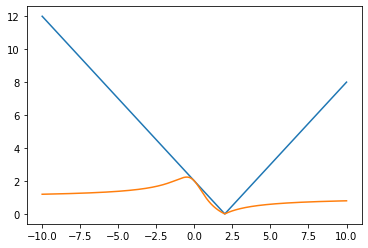

In [18]:
plt.plot(x,np.linalg.norm((grad_log_normal(x,mu=2)).reshape(1,100000), axis=0))
plt.plot(x,np.linalg.norm(((grad_log_normal(x,mu=2))*m(x)).reshape(1,100000),axis=0))

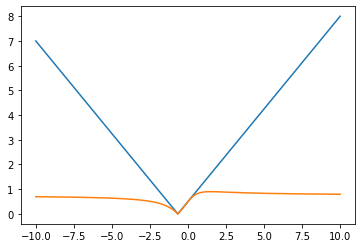

In [19]:
plt.plot(x,np.linalg.norm((grad_log_normal(x)-grad_log_normal(x,mu=2, sigma=2)).reshape(1,100000), axis=0))
plt.plot(x,np.linalg.norm(((grad_log_normal(x)-grad_log_normal(x,mu=2, sigma=2))*m(x)).reshape(1,100000),axis=0))

In [20]:
!pip install pyhtnorm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [21]:
from pyhtnorm import hyperplane_truncated_mvnorm, structured_precision_mvnorm
import numpy as np

rng = np.random.default_rng()

# generate example input
k1, k2 = 1000, 1
temp = rng.random((k1, k1))
cov = temp @ temp.T
G = np.ones((k2, k1))
r = np.zeros(k2)
mean = rng.random(k1)

# passing `random_state` is optional. If the argument is not used, a fresh
# random generator state is instantiated internally using system entropy.
o = hyperplane_truncated_mvnorm(mean, cov, G, r, random_state=rng)
print(o.sum())  # verify if sampled values sum to zero
# alternatively one can pass an array to store the results in


1.3500311979441904e-12


array([ 20.98991295,  -1.94139131,  -3.8320784 ,  -2.16710808,
         5.83592492,  13.76580679,   9.34876741,   5.11978906,
        -5.48942074,   3.21557533,   2.80327067,   1.51089171,
         0.4883768 , -13.58488906,  -8.55166385,  10.72097182,
        21.7489699 ,  -6.57076597,  -7.94532123,   8.77598876,
         5.36984169,   3.0103527 ,   3.18900675,  26.88794831,
         0.65586616,   0.49669949,   1.93403834,   3.33882452,
       -11.39555277,  -2.50896539,   3.2486306 ,   4.17416219,
        -9.2025444 ,  -1.21266813,  -3.37531254,   1.24125877,
       -15.36851632,  -9.74875102,  -2.78812538,  -4.31609364,
        -3.11662001,  -6.20693544,  11.29010005,  14.45555406,
       -12.74258791,   7.36257482, -14.78714959,   6.61107798,
        11.34146952,  -8.23584619,  10.47928301,   6.61192836,
         4.38589601,   4.66013707,  -7.62561166,   2.32808305,
        -0.43557886,   7.96419103,   9.05736907,   5.56561164,
        -0.28046468,  12.69023652,   6.86247521,  11.48